# Árboles de decision

## Ejemplo manual

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams['font.size'] = 20

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
target_classes = list(reversed(data.target_names))

y = data.target == 0 # if zero then we detect malignant tumor.
X = data.data[:, [0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

In [7]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

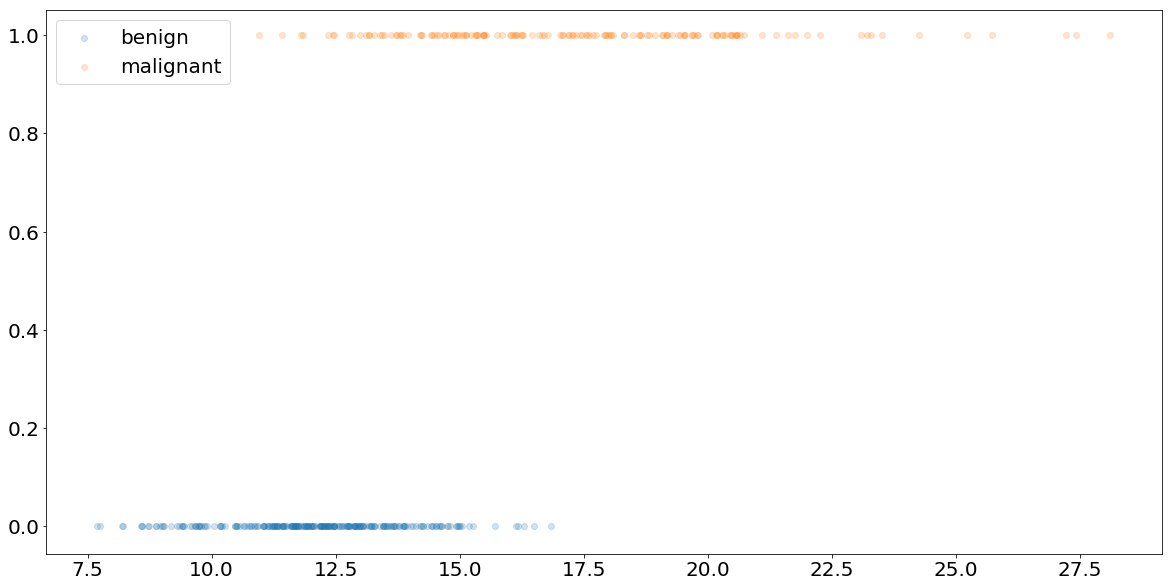

In [54]:
plt.scatter(X_train[~y_train, 0], y_train[~y_train], alpha=0.2, label=target_classes[0])
plt.scatter(X_train[y_train, 0], y_train[y_train], alpha=0.2, label=target_classes[1])
plt.legend()
plt.show()

In [55]:
y_test_hat = X_test[:, 0] > 13

print("Accuracy score :", accuracy_score(y_test, y_test_hat))
print("Precision :", precision_score(y_test, y_test_hat))
print("Recall :", recall_score(y_test, y_test_hat))
print("F1-score :", f1_score(y_test, y_test_hat))

Accuracy score : 0.7485380116959064
Precision : 0.6
Recall : 0.9523809523809523
F1-score : 0.736196319018405


## Machine Learning

In [9]:
def metrics(y, predicted, scores):
    return {
        'accuracy': accuracy_score(y, predicted),
        'precision': precision_score(y, predicted),
        'recall': recall_score(y, predicted),
        'f1-score': f1_score(y, predicted), 
        'auc': roc_auc_score(y, scores)}

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)
y_test_score = clf.predict_proba(X_test)[:, 1]

metrics(y_test, y_test_hat, y_test_score)

{'accuracy': 0.9181286549707602,
 'precision': 0.9454545454545454,
 'recall': 0.8253968253968254,
 'f1-score': 0.8813559322033897,
 'auc': 0.9459876543209876}

In [14]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

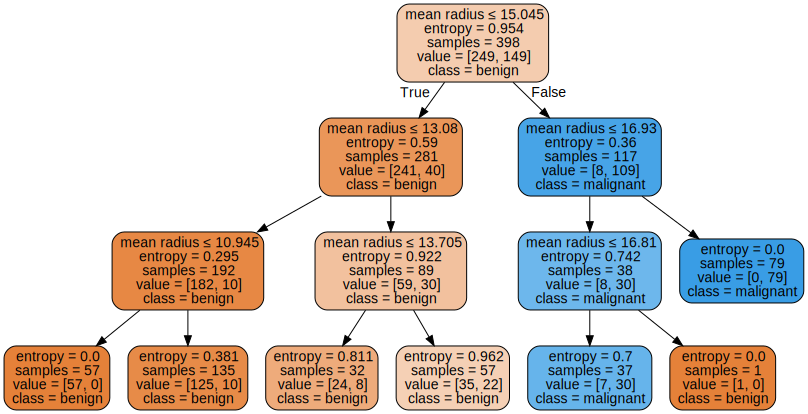

In [15]:
from sklearn.tree import  export_graphviz
import graphviz 
dot_data = export_graphviz(
    clf, out_file=None, 
    class_names=target_classes,
    feature_names=data.feature_names[:1],
    filled=True, rounded=True,  
    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Usando todas las variables

In [16]:
X = data.data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)
y_test_score = clf.predict_proba(X_test)[:, 1]

metrics(y_test, y_test_hat, y_test_score)

{'accuracy': 0.9532163742690059,
 'precision': 0.9824561403508771,
 'recall': 0.8888888888888888,
 'f1-score': 0.9333333333333333,
 'auc': 0.9753086419753086}

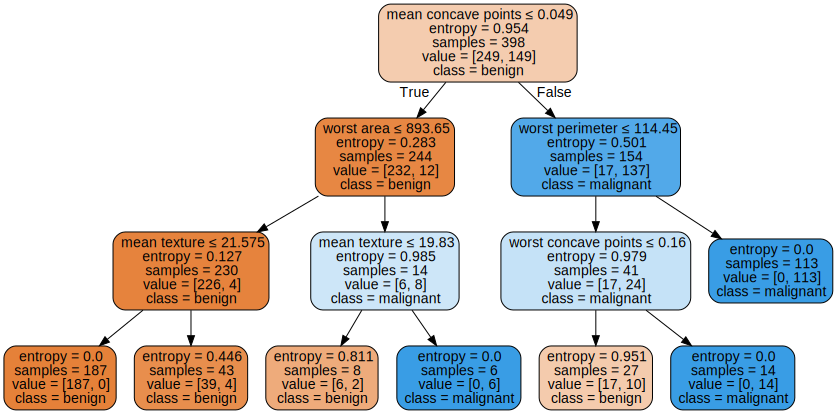

In [17]:
dot_data = export_graphviz(
    clf, out_file=None, 
    feature_names=data.feature_names,
    class_names=target_classes,  
    filled=True, rounded=True,  
    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [19]:
X = data.data

X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

In [20]:
grid_metrics = []
for depth in range(1, 21):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_dev_hat = clf.predict(X_dev)
    accuaracy = accuracy_score(y_dev, y_dev_hat)
    f1 = f1_score(y_dev, y_dev_hat)
    grid_metrics.append((depth, accuaracy, f1))
grid_metrics

[(1, 0.9385964912280702, 0.9066666666666667),
 (2, 0.9385964912280702, 0.9113924050632912),
 (3, 0.9473684210526315, 0.9210526315789473),
 (4, 0.9473684210526315, 0.9230769230769231),
 (5, 0.9473684210526315, 0.9230769230769231),
 (6, 0.9473684210526315, 0.9230769230769231),
 (7, 0.9473684210526315, 0.925),
 (8, 0.9298245614035088, 0.8947368421052632),
 (9, 0.9473684210526315, 0.9230769230769231),
 (10, 0.9473684210526315, 0.9230769230769231),
 (11, 0.956140350877193, 0.9333333333333332),
 (12, 0.956140350877193, 0.9333333333333332),
 (13, 0.9473684210526315, 0.918918918918919),
 (14, 0.9473684210526315, 0.9230769230769231),
 (15, 0.9473684210526315, 0.925),
 (16, 0.9473684210526315, 0.9210526315789473),
 (17, 0.9473684210526315, 0.9230769230769231),
 (18, 0.9473684210526315, 0.918918918918919),
 (19, 0.9298245614035088, 0.8947368421052632),
 (20, 0.9473684210526315, 0.925)]

In [28]:
grid_metrics = []
for depth in range(1, 40):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_dev_hat = clf.predict(X_dev)
    y_train_hat = clf.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_hat)
    accuracy_dev = accuracy_score(y_dev, y_dev_hat)
    grid_metrics.append((depth, accuracy_train, accuracy_dev))
grid_metrics

[(1, 0.9237536656891495, 0.9385964912280702),
 (2, 0.9618768328445748, 0.9385964912280702),
 (3, 0.9736070381231672, 0.9473684210526315),
 (4, 0.9853372434017595, 0.956140350877193),
 (5, 0.9912023460410557, 0.9473684210526315),
 (6, 1.0, 0.9473684210526315),
 (7, 1.0, 0.956140350877193),
 (8, 1.0, 0.9473684210526315),
 (9, 1.0, 0.9473684210526315),
 (10, 1.0, 0.9473684210526315),
 (11, 1.0, 0.956140350877193),
 (12, 1.0, 0.9473684210526315),
 (13, 1.0, 0.9473684210526315),
 (14, 1.0, 0.9473684210526315),
 (15, 1.0, 0.9385964912280702),
 (16, 1.0, 0.956140350877193),
 (17, 1.0, 0.956140350877193),
 (18, 1.0, 0.956140350877193),
 (19, 1.0, 0.956140350877193),
 (20, 1.0, 0.9473684210526315),
 (21, 1.0, 0.9473684210526315),
 (22, 1.0, 0.9385964912280702),
 (23, 1.0, 0.956140350877193),
 (24, 1.0, 0.956140350877193),
 (25, 1.0, 0.956140350877193),
 (26, 1.0, 0.956140350877193),
 (27, 1.0, 0.9385964912280702),
 (28, 1.0, 0.9473684210526315),
 (29, 1.0, 0.9473684210526315),
 (30, 1.0, 0.9473

In [29]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [30]:
iplot([
    go.Scatter(
        x=[m[0] for m in grid_metrics], 
        y=[m[1] for m in grid_metrics]),
    go.Scatter(
        x=[m[0] for m in grid_metrics], 
        y=[m[2] for m in grid_metrics])
])

* Capitulo 9, <https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf>